## Insight 1
### ¿Cómo ha evolucionado el Covid-19 en Argentina y Colombia en comparación con el impacto observado a nivel global?

Importamos librerías

In [129]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

Importamos los datos 

In [130]:
df_covid_limpio = pd.read_csv('covid_clean.csv', sep=';')

Verificamos las estructuras de datos

In [131]:
df_covid_limpio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48902 entries, 0 to 48901
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date_reported      48902 non-null  object 
 1   Country_code       48902 non-null  object 
 2   Country            48902 non-null  object 
 3   New_cases          48902 non-null  int64  
 4   Cumulative_cases   48902 non-null  int64  
 5   New_deaths         48902 non-null  int64  
 6   Cumulative_deaths  48902 non-null  int64  
 7   lethality_rate     48902 non-null  float64
dtypes: float64(1), int64(4), object(3)
memory usage: 3.0+ MB


Convertimos Date_reported a DateTime

In [132]:
df_covid_limpio['Date_reported'] = pd.to_datetime(df_covid_limpio['Date_reported'])
df_covid_limpio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48902 entries, 0 to 48901
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date_reported      48902 non-null  datetime64[ns]
 1   Country_code       48902 non-null  object        
 2   Country            48902 non-null  object        
 3   New_cases          48902 non-null  int64         
 4   Cumulative_cases   48902 non-null  int64         
 5   New_deaths         48902 non-null  int64         
 6   Cumulative_deaths  48902 non-null  int64         
 7   lethality_rate     48902 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(2)
memory usage: 3.0+ MB


### Worldwide Cases Distribution

In [133]:
df_covid_limpio.head()

,Date_reported,Country_code,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,lethality_rate
0,2020-01-05,AF,Afghanistan,0,0,0,0,0.0
1,2020-01-12,AF,Afghanistan,0,0,0,0,0.0
2,2020-01-19,AF,Afghanistan,0,0,0,0,0.0
3,2020-01-26,AF,Afghanistan,0,0,0,0,0.0
4,2020-02-02,AF,Afghanistan,0,0,0,0,0.0


In [134]:
total_por_pais = df_covid_limpio.groupby('Country')
total_por_pais = total_por_pais['Cumulative_cases'].max().sort_values(ascending = False)

In [135]:
top_10_paises = total_por_pais.nlargest(10)
top_10_paises

Country
United States of America                                103436829
China                                                    99326423
India                                                    45023751
France                                                   38997490
Germany                                                  38437756
Brazil                                                   37519960
Republic of Korea                                        34571873
Japan                                                    33803572
Italy                                                    26693706
United Kingdom of Great Britain and Northern Ireland     24885790
Name: Cumulative_cases, dtype: int64

In [136]:
otros = total_por_pais.drop(top_10_paises.index).sum() #esto sería el total de casos acumulados mundialmente
top_10_paises['Otros'] = otros
top_10_paises

Country
United States of America                                103436829
China                                                    99326423
India                                                    45023751
France                                                   38997490
Germany                                                  38437756
Brazil                                                   37519960
Republic of Korea                                        34571873
Japan                                                    33803572
Italy                                                    26693706
United Kingdom of Great Britain and Northern Ireland     24885790
Otros                                                   291519855
Name: Cumulative_cases, dtype: int64

Analizamos la evolución de los casos en Argentina

In [137]:
# Se crea la variable ARG
ARG =  df_covid_limpio['Country'] == 'Argentina'
ARG = df_covid_limpio[ARG]
ARG = ARG.groupby('Country')
ARG = ARG['Cumulative_cases'].max()
ARG

Country
Argentina    10081076
Name: Cumulative_cases, dtype: int64

Analizamos la evolución de los casos en Colombia

In [138]:
#Se crea la variable COL
COL =  df_covid_limpio['Country'] == 'Colombia'
COL = df_covid_limpio[COL]
COL = COL.groupby('Country')
COL = COL['Cumulative_cases'].max()
COL

Country
Colombia    6391672
Name: Cumulative_cases, dtype: int64

Argentina y Colombia vs TOP 10 paises con mayores contagios a nivel mundial

In [139]:
top_10_paises_col_arg = top_10_paises.copy()
#Se agrega la Fila 'Argentina'
top_10_paises_col_arg['Argentina'] = np.sum(ARG)
#Se agrega la Fila 'Colombia'
top_10_paises_col_arg['Colombia'] = np.sum(COL)
#Se elimina la fila 'Otros' para su remplazo
top_10_paises_col_arg = top_10_paises_col_arg.drop('Otros')
#Se le resta la información de la fila 'Otros' del DataFrame 'top_10_paises' con el total de 'Cumulative_cases' en Colombia y Argentina
otros = top_10_paises['Otros'] - top_10_paises_col_arg['Colombia'] - top_10_paises_col_arg['Argentina']
# Se actualiza la fila 'Otros' con la información
top_10_paises_col_arg['Otros'] = otros
top_10_paises_col_arg

Country
United States of America                                103436829
China                                                    99326423
India                                                    45023751
France                                                   38997490
Germany                                                  38437756
Brazil                                                   37519960
Republic of Korea                                        34571873
Japan                                                    33803572
Italy                                                    26693706
United Kingdom of Great Britain and Northern Ireland     24885790
Argentina                                                10081076
Colombia                                                  6391672
Otros                                                   275047107
Name: Cumulative_cases, dtype: int64

In [140]:
col_arg_cases = top_10_paises_col_arg.copy()

not_col_arg = []
for country, cases in top_10_paises_col_arg.items():
  if (country not in['Argentina', 'Colombia']):
    not_col_arg.append(country)

col_arg_cases = col_arg_cases.drop(not_col_arg)
col_arg_cases

Country
Argentina    10081076
Colombia      6391672
Name: Cumulative_cases, dtype: int64

### Case Progression by Country

In [141]:
total_por_país = df_covid_limpio.groupby('Country')
total_por_país
total_por_país=total_por_país['Cumulative_cases'].max().sort_values(ascending = False)

In [142]:
top_5_paises = total_por_país.head(5)
top_5_paises

Country
United States of America    103436829
China                        99326423
India                        45023751
France                       38997490
Germany                      38437756
Name: Cumulative_cases, dtype: int64

In [143]:
top_5_paises_col_arg = top_5_paises.copy()
top_5_paises_col_arg['Argentina'] = np.sum(ARG)
top_5_paises_col_arg['Colombia'] = np.sum(COL)

In [144]:
top_5_paises_col_arg

Country
United States of America    103436829
China                        99326423
India                        45023751
France                       38997490
Germany                      38437756
Argentina                    10081076
Colombia                      6391672
Name: Cumulative_cases, dtype: int64

In [145]:
col_arg_cases_line = top_5_paises_col_arg.copy()

not_col_arg = []
for country, cases in top_5_paises_col_arg.items():
  if (country not in['Argentina', 'Colombia']):
    not_col_arg.append(country)

col_arg_cases_line = col_arg_cases_line.drop(not_col_arg)
col_arg_cases_line

Country
Argentina    10081076
Colombia      6391672
Name: Cumulative_cases, dtype: int64

In [146]:
df_covid_limpio_reset = df_covid_limpio.reset_index(drop=True)
df_covid_limpio_reset.head()

,Date_reported,Country_code,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,lethality_rate
0,2020-01-05,AF,Afghanistan,0,0,0,0,0.0
1,2020-01-12,AF,Afghanistan,0,0,0,0,0.0
2,2020-01-19,AF,Afghanistan,0,0,0,0,0.0
3,2020-01-26,AF,Afghanistan,0,0,0,0,0.0
4,2020-02-02,AF,Afghanistan,0,0,0,0,0.0


In [147]:
df_covid_limpio_reset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48902 entries, 0 to 48901
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date_reported      48902 non-null  datetime64[ns]
 1   Country_code       48902 non-null  object        
 2   Country            48902 non-null  object        
 3   New_cases          48902 non-null  int64         
 4   Cumulative_cases   48902 non-null  int64         
 5   New_deaths         48902 non-null  int64         
 6   Cumulative_deaths  48902 non-null  int64         
 7   lethality_rate     48902 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(2)
memory usage: 3.0+ MB


In [148]:
top_5_paises_col_arg.index

Index(['United States of America', 'China', 'India', 'France', 'Germany',
       'Argentina', 'Colombia'],
      dtype='object', name='Country')

In [149]:
df_top_5_col_arg = df_covid_limpio_reset[df_covid_limpio_reset['Country'].isin(top_5_paises_col_arg.index)]
df_top_5_col_arg.head()

,Date_reported,Country_code,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,lethality_rate
1691,2020-01-05,AR,Argentina,0,0,0,0,0.0
1692,2020-01-12,AR,Argentina,0,0,0,0,0.0
1693,2020-01-19,AR,Argentina,0,0,0,0,0.0
1694,2020-01-26,AR,Argentina,0,0,0,0,0.0
1695,2020-02-02,AR,Argentina,0,0,0,0,0.0


In [150]:
df_col_arg = df_covid_limpio_reset[df_covid_limpio_reset['Country'].isin(["Argentina", "Colombia"])]

In [151]:
total_acumulado_top_5_col_arg = df_top_5_col_arg.pivot(index='Country', columns='Date_reported', values='Cumulative_cases').fillna(0)
total_acumulado_top_5_col_arg

Date_reported,2020-01-05,2020-01-12,2020-01-19,2020-01-26,2020-02-02,2020-02-09,2020-02-16,2020-02-23,2020-03-01,2020-03-08,...,2023-11-19,2023-11-26,2023-12-03,2023-12-10,2023-12-17,2023-12-24,2023-12-31,2024-01-07,2024-01-14,2024-01-21
Country,,,,,,,,,,,,,,,,,,,,,
Argentina,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,...,10073197.0,10073701.0,10074309.0,10074775.0,10075395.0,10076004.0,10076858.0,10078493.0,10081076.0,10081076.0
China,1.0,45.0,125.0,1985.0,14411.0,37251.0,68584.0,77042.0,79968.0,80859.0,...,99320035.0,99320425.0,99320845.0,99321242.0,99321637.0,99322142.0,99322727.0,99323756.0,99325108.0,99326423.0
Colombia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,6383595.0,6383948.0,6384224.0,6384551.0,6384979.0,6385539.0,6386231.0,6387209.0,6389365.0,6391672.0
France,0.0,0.0,0.0,3.0,6.0,12.0,12.0,16.0,16.0,16.0,...,38997490.0,38997490.0,38997490.0,38997490.0,38997490.0,38997490.0,38997490.0,38997490.0,38997490.0,38997490.0
Germany,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,170.0,1075.0,...,38437756.0,38437756.0,38437756.0,38437756.0,38437756.0,38437756.0,38437756.0,38437756.0,38437756.0,38437756.0
India,0.0,0.0,0.0,0.0,2.0,7.0,7.0,7.0,7.0,39.0,...,45001575.0,45001764.0,45002179.0,45003055.0,45004816.0,45008620.0,45013172.0,45018134.0,45021758.0,45023751.0
United States of America,0.0,0.0,0.0,7.0,9.0,20.0,24.0,40.0,73.0,464.0,...,103436829.0,103436829.0,103436829.0,103436829.0,103436829.0,103436829.0,103436829.0,103436829.0,103436829.0,103436829.0


In [152]:
total_acumulado_col_arg = df_col_arg.pivot(index='Country', columns='Date_reported', values='Cumulative_cases').fillna(0)
total_acumulado_col_arg

Date_reported,2020-01-05,2020-01-12,2020-01-19,2020-01-26,2020-02-02,2020-02-09,2020-02-16,2020-02-23,2020-03-01,2020-03-08,...,2023-11-19,2023-11-26,2023-12-03,2023-12-10,2023-12-17,2023-12-24,2023-12-31,2024-01-07,2024-01-14,2024-01-21
Country,,,,,,,,,,,,,,,,,,,,,
Argentina,0,0,0,0,0,0,0,0,0,22,...,10073197,10073701,10074309,10074775,10075395,10076004,10076858,10078493,10081076,10081076
Colombia,0,0,0,0,0,0,0,0,0,1,...,6383595,6383948,6384224,6384551,6384979,6385539,6386231,6387209,6389365,6391672


In [153]:
col_arg_cases

Country
Argentina    10081076
Colombia      6391672
Name: Cumulative_cases, dtype: int64

Gráfica en términos relativos

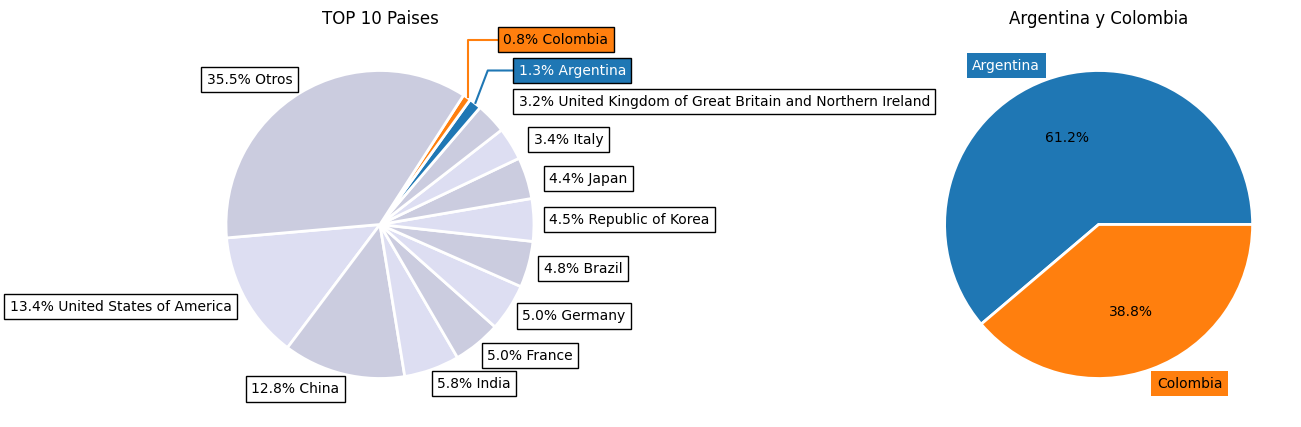

In [154]:
# Gráfico de Donuts
fig, axs = plt.subplots(1, 2, figsize=(17, 5))

#wedges son las líneas de los contornos del gráfico
#texts almacena los labels "Argentina" "Colombia"
#autotexts almacena los % dentro del pie

#Plot 1
axs[0].set_title('TOP 10 Paises')
wedges, texts, autotexts = axs[0].pie(
  top_10_paises_col_arg,
  labels=top_10_paises_col_arg.index,
  autopct='%1.1f%%',
  # pctdistance=1.2
  startangle=185,
  wedgeprops={
  "edgecolor": "white",
  "linewidth": 2,
  },
  colors=['#dddef2','#cbccdf', '#dddef2', '#cbccdf', '#dddef2', '#cbccdf', '#dddef2', '#cbccdf', '#dddef2','#cbccdf', '#1F77B4','#FF7F0E', '#cbccdf']
)

labels = []

for index, country in enumerate(texts):
  country.set_bbox(dict(facecolor='white', alpha=1))
  labels.append(f'{autotexts[index].get_text()} {country.get_text()}')

for index, text in enumerate(texts):
  text.set_text(labels[index])

usa, china, india, france, germany, brazil, korea, japan, italy, uk, argentina, colombia, otros = [country for country in texts]


#Ajustamos la posición de colombia porque pisa a Argentina
colombia.set_position((0.8, 1.2))
colombia.set_bbox(dict(facecolor='#FF7F0E', alpha=1))
axs[0].plot([0.57, 0.57, 0.8],[0.83, 1.2, 1.2], color="#FF7F0E", linewidth=1.5)


#Ajustamos la posición de Argentina porque pisa a UK
argentina.set_position((0.9, 1))
argentina.set_bbox(dict(facecolor='#1F77B4', alpha=1))
argentina.set_color('white')
axs[0].plot([0.62, 0.7, 1],[0.79, 1, 1], color="#1F77B4", linewidth=1.5)

#Ajustamos la posición de UK
uk.set_position((0.9, 0.8))

# #Ajustamos la posición de Italy
italy.set_position((1, 0.55))

# #Ajustamos la posicion de japan
japan.set_position((1.1, 0.3))

#Ocultamos los % del pieplot
for pct in autotexts:
  pct.set_text('')


#Plot 2
axs[1].set_title('Argentina y Colombia')
wedges, texts, autotexts = axs[1].pie(
  col_arg_cases,
  labels=col_arg_cases.index,
  autopct='%1.1f%%',
  wedgeprops={
    "edgecolor": "white",
    "linewidth": 2,
  }
)

argentina = texts[0]
argentina.set_bbox(dict(facecolor='#1F77B4', alpha=1, edgecolor="none"))
argentina.set_color('white')

colombia = texts[1]
colombia.set_bbox(dict(facecolor='#FF7F0E', alpha=1, edgecolor="none"))

plt.show()

**Conclusión 1.1:** <br>
Apreciamos que la evolución del covid-19 en Argentina y Colombia fué bastante controlada en comparación a los 10 paises con mayor índice de evolución. Sin embargo, comparando estos Argentina y Colombia entre sí podemos apreciar que Colombia pudo mitigar mucho más la evolución de los contagios en época de pandemia en comparación a Argentina.


Gráfica en términos absolutos

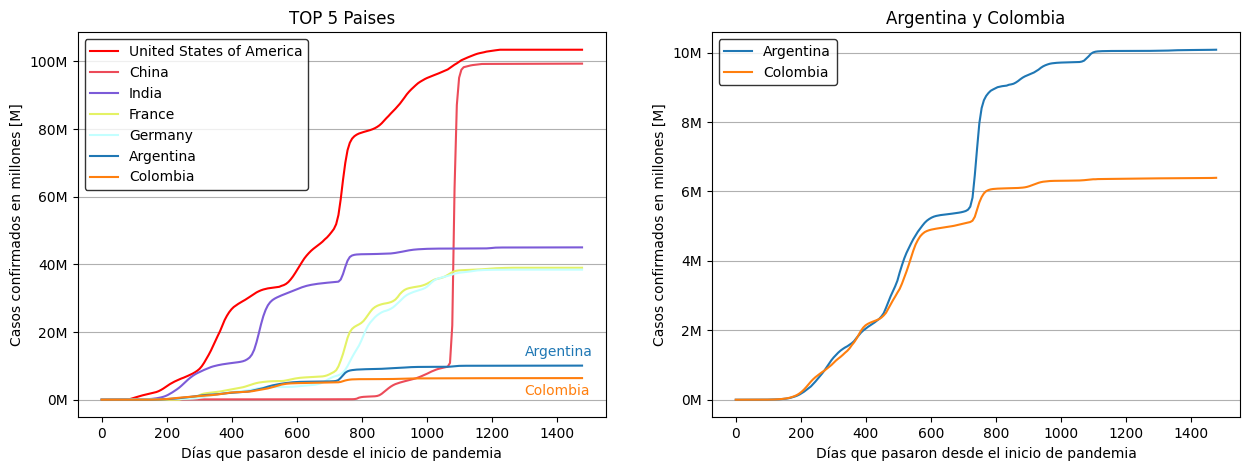

In [155]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Gráfico de Líneas TOP 5
axs[0].set_title('TOP 5 Paises')
colors0=['red', '#ec4b59', '#7c5bd8','#e4f265', '#c3ffff','#1F77B4','#FF7F0E']
y_arg = total_acumulado_top_5_col_arg.loc["Argentina"][-1]
y_col = total_acumulado_top_5_col_arg.loc["Colombia"][-1]
for index, pais in enumerate(top_5_paises_col_arg.index):
    days_since_start = (total_acumulado_top_5_col_arg.columns - total_acumulado_top_5_col_arg.columns[0]).days
    axs[0].plot(days_since_start, total_acumulado_top_5_col_arg.loc[pais], label=pais, color=colors0[index])
legend = axs[0].legend()
legend = legend.get_frame()
legend.set_color("white")
legend.set_edgecolor("black")
axs[0].set_facecolor("white")
axs[0].annotate("Argentina", xy=(1300,y_arg+3e6), color="#1F77B4")
axs[0].annotate("Colombia", xy=(1300,y_col-5e6), color="#FF7F0E")
axs[0].set_ylabel("Casos confirmados en millones [M]")
axs[0].set_yticklabels(["0","0M","20M","40M","60M","80M","100M"])
axs[0].set_xlabel("Días que pasaron desde el inicio de pandemia")
axs[0].grid(axis="y")


#Gráfico de líneas Argentina-Colombia
y_labels=[]
axs[1].set_title('Argentina y Colombia')
colors1=['#1F77B4','#FF7F0E']
days_since_start = (total_acumulado_col_arg.columns - total_acumulado_col_arg.columns[0]).days
for index, pais in enumerate(col_arg_cases_line.index):
    axs[1].plot(days_since_start, total_acumulado_col_arg.loc[pais], label=pais, color=colors1[index])
    y_labels.append(total_acumulado_col_arg.loc[pais])

legend = axs[1].legend()
legend = legend.get_frame()
legend.set_color("white")
legend.set_edgecolor("black")
axs[1].set_facecolor("white")
axs[1].set_ylabel("Casos confirmados en millones [M]")
axs[1].set_xlabel("Días que pasaron desde el inicio de pandemia")
axs[1].grid(axis="y")
axs[1].set_yticklabels(["0","0M","2M","4M","6M","8M","10M"])

plt.show()

**Conclusión 1.2 :**

En cuanto a la evolución de contagios desde el día 0 hasta 4 años después observamos que Argentina y Colombia fueron los paises con menores casos confirmados comparándolos con los TOP 5 paises a nivel mundial